In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
import pandas as pd
import numpy as np
import random
import os
import gc
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
train = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/train.csv')
sub = pd.read_csv('/content/gdrive/MyDrive/서울시 기온 (1)/sample_submission.csv')

In [ ]:
# '일시' 컬럼을 날짜 형식으로 변환
train['일시'] = pd.to_datetime(train['일시'])

# 시각화

In [ ]:
data

,평균기온,일시
0,-1.6,1960-01-01
1,-1.9,1960-01-02
2,4.0,1960-01-03
3,7.5,1960-01-04
4,-4.6,1960-01-05
...,...,...
23006,-2.6,2022-12-27
23007,-3.3,2022-12-28
23008,-2.9,2022-12-29
23009,-1.8,2022-12-30


In [ ]:
# '일시' 컬럼을 날짜 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'])

# 월별로 그룹화하여 평균 계산
monthly_avg_temp = data.groupby(data['일시'].dt.to_period('Y')).mean()

# 결과를 새로운 데이터프레임으로 변환
monthly_avg_temp_df = monthly_avg_temp.reset_index()

<ipython-input-70-fe613857dfca>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_temp = data.groupby(data['일시'].dt.to_period('Y')).mean()


In [ ]:
monthly_avg_temp_df

,일시,평균기온
0,1960,12.104645
1,1961,12.454521
2,1962,11.756986
3,1963,11.312877
4,1964,12.221038
...,...,...
58,2018,13.002466
59,2019,13.598904
60,2020,13.271858
61,2021,13.752055


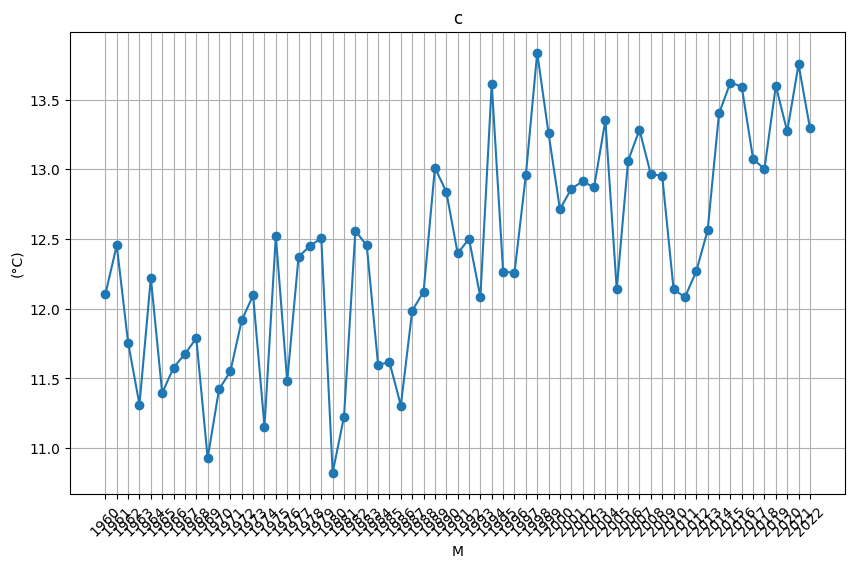

In [ ]:
import matplotlib.pyplot as plt

# '일시' 컬럼을 문자열로 변환
monthly_avg_temp_df['일시'] = monthly_avg_temp_df['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_temp_df['일시'], monthly_avg_temp_df['평균기온'], marker='o')
plt.title('c')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


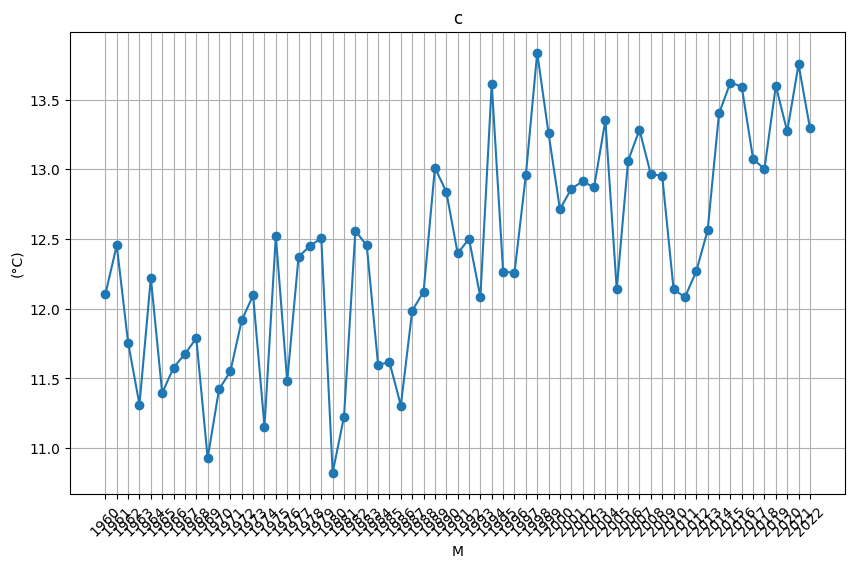

In [ ]:
import matplotlib.pyplot as plt

# '일시' 컬럼을 문자열로 변환
monthly_avg_temp_df['일시'] = monthly_avg_temp_df['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(monthly_avg_temp_df['일시'], monthly_avg_temp_df['평균기온'], marker='o')
plt.title('c')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
# '일시' 컬럼을 날짜 형식으로 변환
data['일시'] = pd.to_datetime(data['일시'])

# 월별로 그룹화하여 평균 계산
monthly_avg_temp = data.groupby(data['일시'].dt.to_period('M')).mean()

# 결과를 새로운 데이터프레임으로 변환
monthly_avg_temp_df = monthly_avg_temp.reset_index()

<ipython-input-164-9275653b7e0e>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly_avg_temp = data.groupby(data['일시'].dt.to_period('M')).mean()


<ipython-input-166-d5cd595ad83f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  january_data['일시'] = january_data['일시'].astype(str)


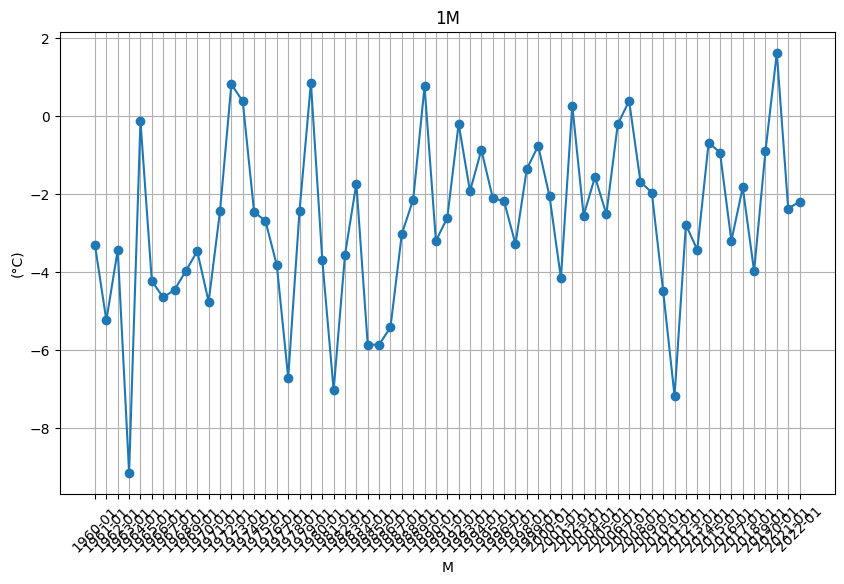

In [ ]:
# 1월 데이터만 필터링
january_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 1]

import matplotlib.pyplot as plt

# '일시' 컬럼을 문자열로 변환
january_data['일시'] = january_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(january_data['일시'], january_data['평균기온'], marker='o')
plt.title('1M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


<ipython-input-167-b4c7f2b83e17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  february_data['일시'] = february_data['일시'].astype(str)


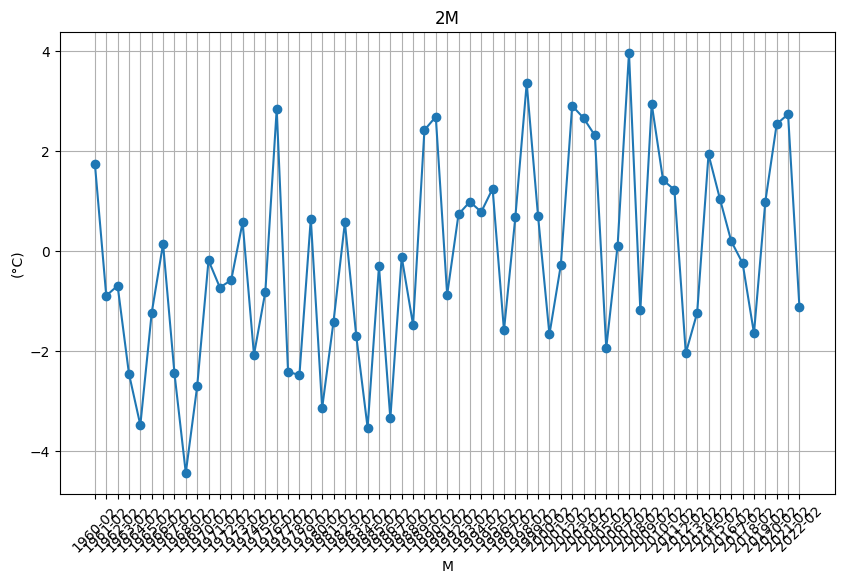

In [ ]:
february_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 2]

# '일시' 컬럼을 문자열로 변환
february_data['일시'] = february_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(february_data['일시'], february_data['평균기온'], marker='o')
plt.title('2M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-168-609bcf89d332>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  March_data['일시'] = March_data['일시'].astype(str)


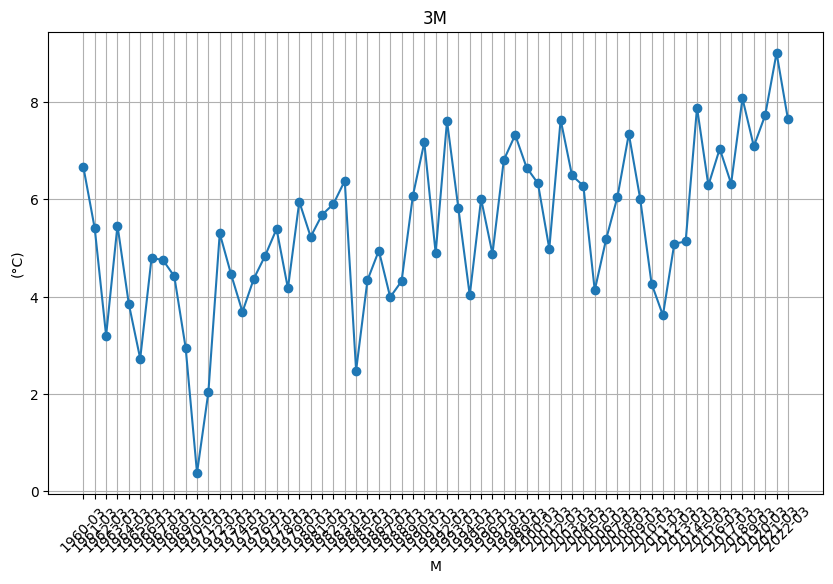

In [ ]:
March_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 3]

# '일시' 컬럼을 문자열로 변환
March_data['일시'] = March_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(March_data['일시'], March_data['평균기온'], marker='o')
plt.title('3M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
March_data

,일시,평균기온
2,1960-03,6.667742
14,1961-03,5.403226
26,1962-03,3.200000
38,1963-03,5.464516
50,1964-03,3.848387
...,...,...
698,2018-03,8.080645
710,2019-03,7.093548
722,2020-03,7.735484
734,2021-03,9.016129


In [ ]:
March_data['평균기온'].min()

0.37419354838709684

<ipython-input-171-5cb50e71b8bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  april_data['일시'] = april_data['일시'].astype(str)


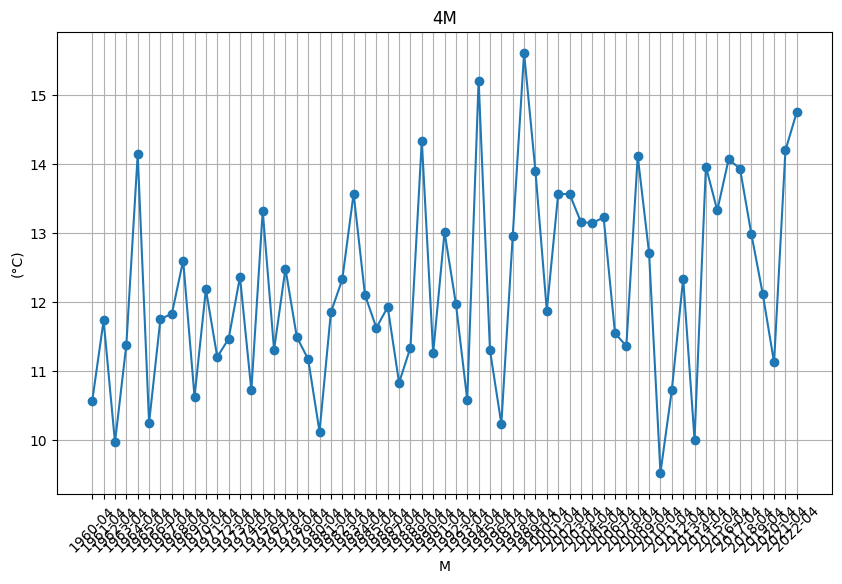

In [ ]:
april_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 4]

# '일시' 컬럼을 문자열로 변환
april_data['일시'] = april_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(april_data['일시'], april_data['평균기온'], marker='o')
plt.title('4M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-172-c43744bbefb4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  May_data['일시'] = May_data['일시'].astype(str)


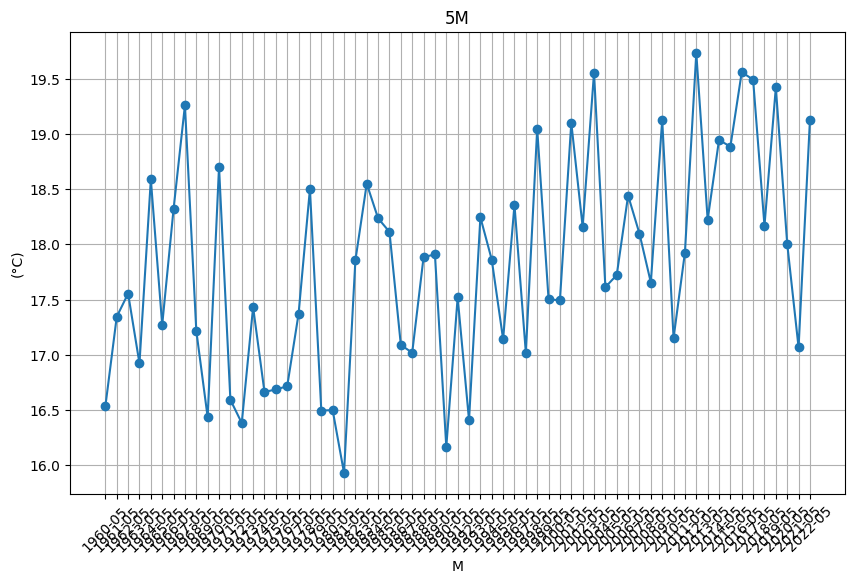

In [ ]:
May_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 5]

# '일시' 컬럼을 문자열로 변환
May_data['일시'] = May_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(May_data['일시'], May_data['평균기온'], marker='o')
plt.title('5M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-173-95097ca5e41f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  June_data['일시'] = June_data['일시'].astype(str)


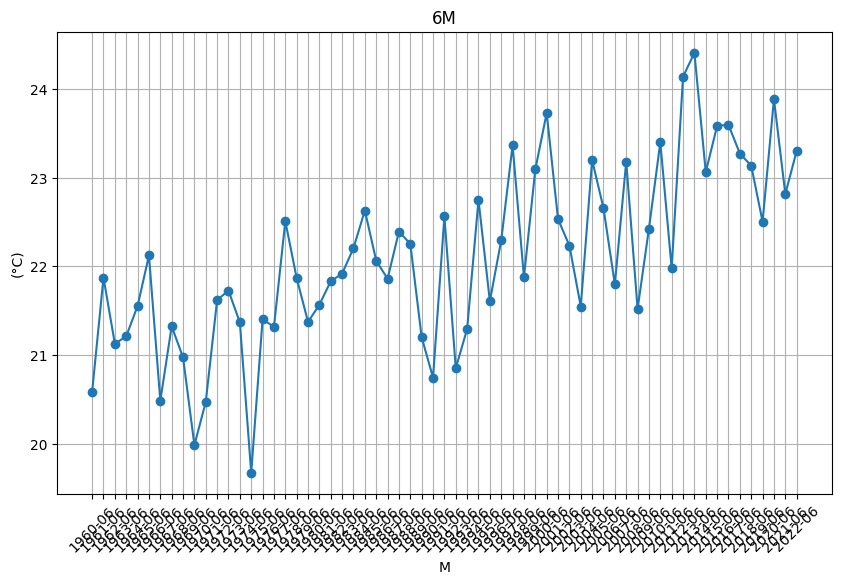

In [ ]:
June_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 6]

# '일시' 컬럼을 문자열로 변환
June_data['일시'] = June_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(June_data['일시'], June_data['평균기온'], marker='o')
plt.title('6M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
June_data

,일시,평균기온
5,1960-06,20.583333
17,1961-06,21.873333
29,1962-06,21.126667
41,1963-06,21.210000
53,1964-06,21.553333
...,...,...
701,2018-06,23.136667
713,2019-06,22.503333
725,2020-06,23.886667
737,2021-06,22.816667


<ipython-input-175-4a2b016a0a65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  July_data['일시'] = July_data['일시'].astype(str)


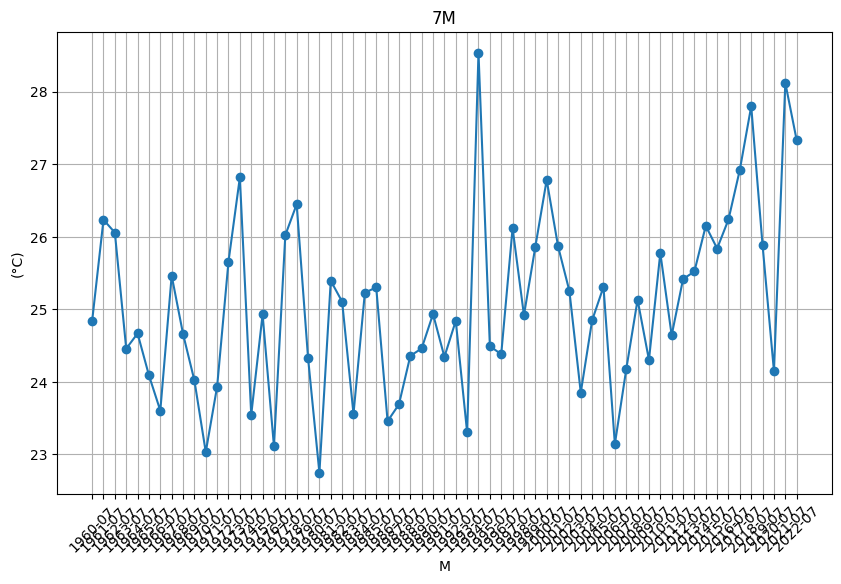

In [ ]:
July_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 7]

# '일시' 컬럼을 문자열로 변환
July_data['일시'] = July_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(July_data['일시'], July_data['평균기온'], marker='o')
plt.title('7M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-176-5c333005c915>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  August_data['일시'] = August_data['일시'].astype(str)


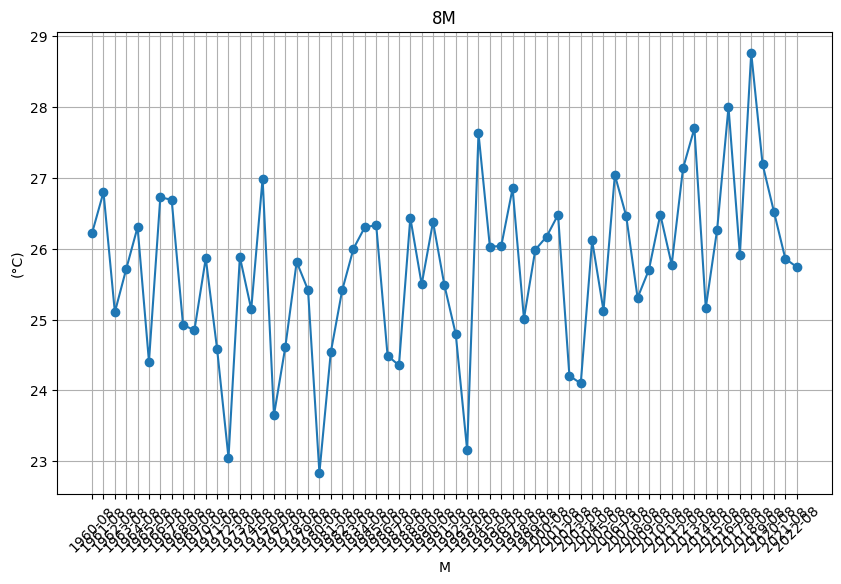

In [ ]:
August_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 8]
# '일시' 컬럼을 문자열로 변환
August_data['일시'] = August_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(August_data['일시'], August_data['평균기온'], marker='o')
plt.title('8M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
August_data

,일시,평균기온
7,1960-08,26.222581
19,1961-08,26.796774
31,1962-08,25.103226
43,1963-08,25.712903
55,1964-08,26.303226
...,...,...
703,2018-08,28.761290
715,2019-08,27.190323
727,2020-08,26.519355
739,2021-08,25.858065


<ipython-input-178-7f0317c48bfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  September_data['일시'] = September_data['일시'].astype(str)


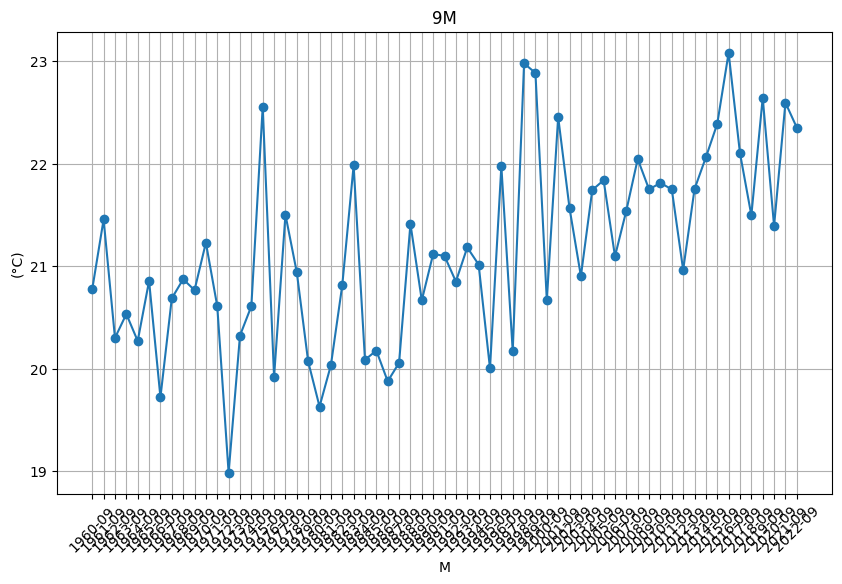

In [ ]:
September_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 9]

# '일시' 컬럼을 문자열로 변환
September_data['일시'] = September_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(September_data['일시'], September_data['평균기온'], marker='o')
plt.title('9M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-179-6e04013d9d90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  october_data['일시'] = october_data['일시'].astype(str)


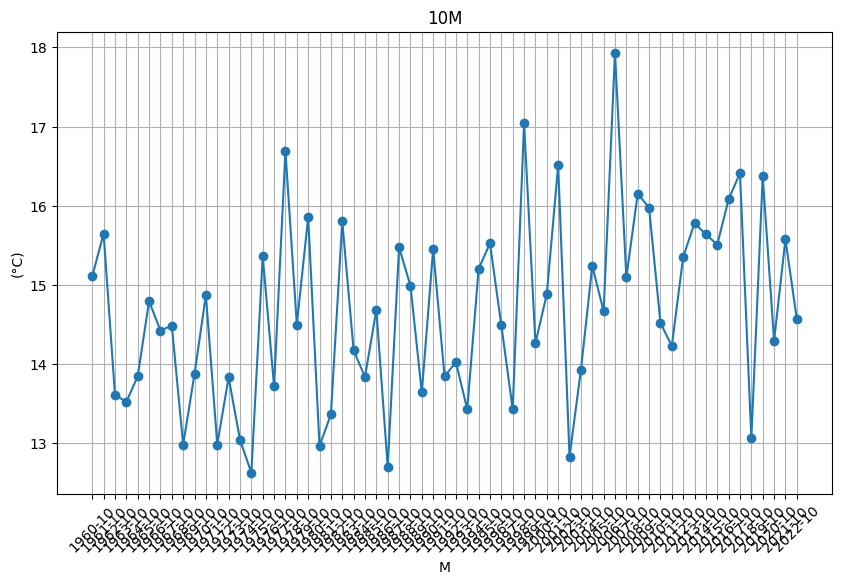

In [ ]:
october_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 10]

# '일시' 컬럼을 문자열로 변환
october_data['일시'] = october_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(october_data['일시'], october_data['평균기온'], marker='o')
plt.title('10M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-180-0ced36ccf37e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  November_data['일시'] = November_data['일시'].astype(str)


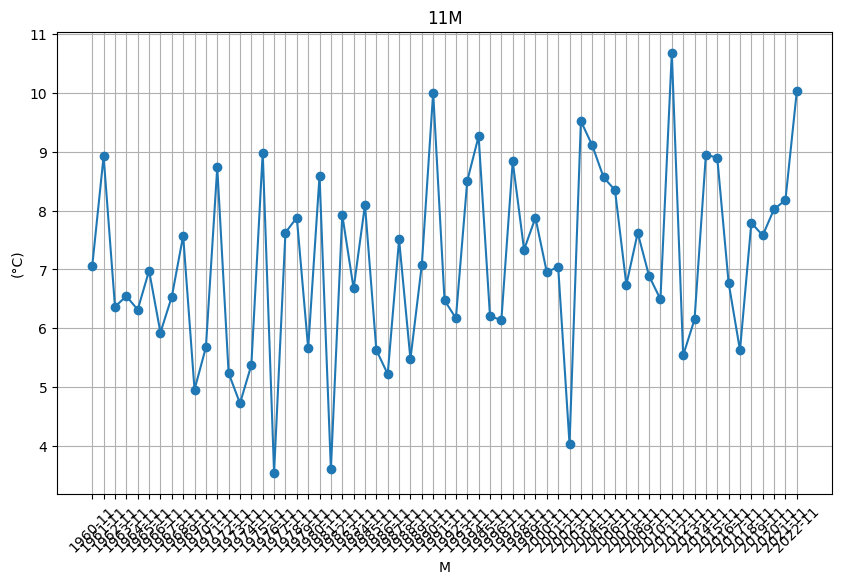

In [ ]:
November_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 11]

# '일시' 컬럼을 문자열로 변환
November_data['일시'] = November_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(November_data['일시'], November_data['평균기온'], marker='o')
plt.title('11M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<ipython-input-181-e7054cd9eb3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  december_data['일시'] = december_data['일시'].astype(str)


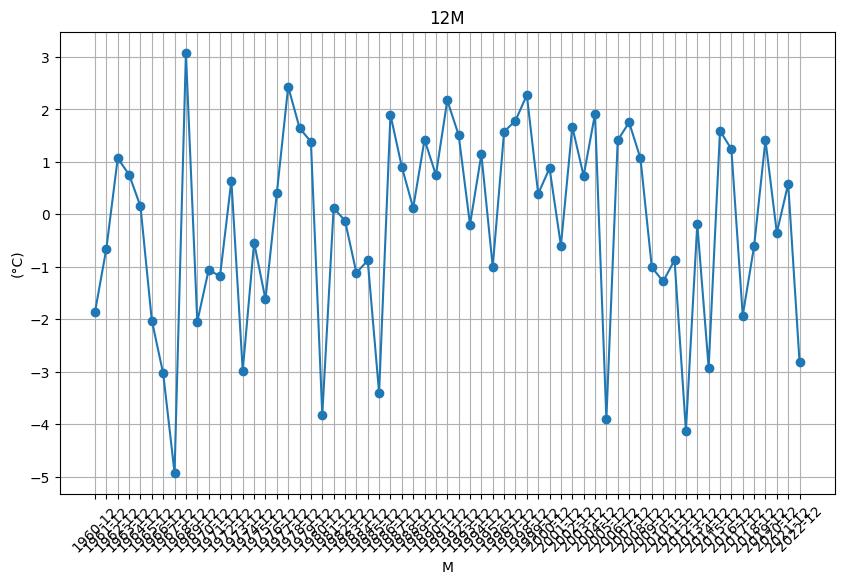

In [ ]:
december_data = monthly_avg_temp_df[monthly_avg_temp_df['일시'].dt.month == 12]
# '일시' 컬럼을 문자열로 변환
december_data['일시'] = december_data['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(10,6))
plt.plot(december_data['일시'], december_data['평균기온'], marker='o')
plt.title('12M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

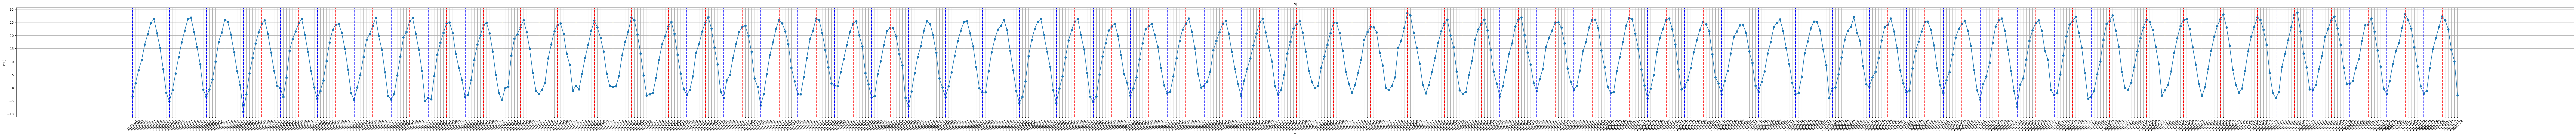

In [ ]:
import matplotlib.pyplot as plt

# '일시' 컬럼을 문자열로 변환
monthly_avg_temp_df['일시'] = monthly_avg_temp_df['일시'].astype(str)

# 1월 데이터 시각화
plt.figure(figsize=(140,6))
plt.plot(monthly_avg_temp_df['일시'], monthly_avg_temp_df['평균기온'], marker='o')

# 1월과 7월에 해당하는 날짜에 수직선 추가
for date in monthly_avg_temp_df['일시']:
    if '-01' in date:  # 1월
        plt.axvline(x=date, color='blue', linestyle='--', lw=2)
    elif '-07' in date:  # 7월
        plt.axvline(x=date, color='red', linestyle='--', lw=2)

plt.title('M')
plt.xlabel('M')
plt.ylabel('(°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# 결론

1. 달별 기온에 가중치를 가해야 한다. 평균기온보다 높은 값을 더 높게 만들고, 평균기온보다 낮은 값을 더 낮게 만들어서 기온에 극단적으로 값을 수정해야 한다.

2. 180일 간의 주기성이 보인다. 모델에 주기성을 추가해야 한다.